<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/NLP-Projects/blob/main/Bag-Of-Words-Explorer/BoW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Bag of Words (BoW) Exploration Project

This script implements different variations of the Bag of Words (BoW) technique
on a small text corpus, including simple counting, binary, and N-Grams.
It also examines the effect of stopword removal and compares the resulting matrices.
"""

# Import Libraries & Basic Setup

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

from typing import List, Dict, Optional
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import logging

# Setup logging
logging.basicConfig(level=logging.INFO,
                    format="%*(asctime)s - %(levelname)s - %(message)s")
logger = logging.getLogger(__name__)

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Bag Of Words Class

In [15]:
class BoWExplorer:
    def __init__(self, corpus: List[str]):
        """
        Initialize with a text corpus.

        Args:
            corpus (List[str]): List of text documents.
        """
        if not corpus or not all(isinstance(doc, str) for doc in corpus):
            raise ValueError("Corpus must be non-empty list of strings.")
        self.corpus = corpus
        self.results = {}

    def apply_bow(self,
                  binary: bool = False,
                  ngram_range: tuple = (1, 1),
                  stop_words: Optional[str] = None) -> Dict[str, np.ndarray]:
        """
        Apply BoW with specified parameters.

        Args:
            binary (bool): Whether to use binary BoW (default: False).
            ngram_range (tuple): Range of n-grams (e.g., (1, 2) for unigrams and bigrams).
            stop_words (str, optional): Language for stopword removal (e.g., 'english').

        Returns:
            Dict[str, np.ndarray]: Vocabulary and BoW matrix.
        """
        try:
            vectorizer = CountVectorizer(
                binary = binary,
                ngram_range = ngram_range,
                stop_words = stop_words)
            bow_matrix = vectorizer.fit_transform(self.corpus)
            result = {
                'VOCABULARY': vectorizer.get_feature_names_out(),
                'MATRIX': bow_matrix.toarray()
            }
            logger.info(f"BoW Applied: binary={binary}, ngram_range={ngram_range}, stop_words={stop_words}")
            return result
        except Exception as e:
            logger.error(f"Error in applying BoW: {e}")
            return {'vocabulary': np.array([]), 'matrix': np.array([])}

    def run_experiments(self):
        """Run all BoW experiments and store results."""
        self.results['simple_count'] = self.apply_bow(binary=False)                                    # Simple Count BoW
        self.results['binary'] = self.apply_bow(binary=True)                                           # Binary BoW
        self.results['ngrams'] = self.apply_bow(ngram_range=(1, 2))                                    # N-Grams BoW (unigrams and bigrams)
        self.results['simple_no_stopwords'] = self.apply_bow(binary=False, stop_words='english')       # Simple Count BoW with Stopword Removal

    def display_results(self) -> None:
        """Display BoW matrices as DataFrames."""
        for method, result in self.results.items():
            if result['VOCABULARY'].size == 0:
                logger.warning(f"No results for {method}")
                continue
            df = pd.DataFrame(
                result['MATRIX'],
                columns=result['VOCABULARY'],
                index=[f"Doc {i+1}" for i in range(len(self.corpus))]
            )
            print(f"\n{method.replace('_', ' ').title()} BoW Matrix:")
            print(df.to_string())
            logger.info(f"Displayed {method} matrix with vocab size: {len(result['VOCABULARY'])}")

    def compare_sparsity(self) -> None:
        """Compare sparsity of BoW matrices and visualize."""
        sparsity_data = {}
        for method, result in self.results.items():
            if result['MATRIX'].size == 0:
                continue
            total_elements = result['MATRIX'].size
            non_zero_elements = np.count_nonzero(result['MATRIX'])
            sparsity = 1 - (non_zero_elements / total_elements)
            sparsity_data[method] = sparsity

        # Visualization
        plt.figure(figsize=(10, 5))
        sns.barplot(x=list(sparsity_data.keys()), y=list(sparsity_data.values()), palette='viridis')
        plt.title('Sparsity Comparison Across BoW Methods', fontsize=15, fontweight='bold')
        plt.xlabel('BoW Method')
        plt.ylabel('Sparsity (Fraction of Zeros)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('sparsity_comparison.png')
        plt.show()
        logger.info("Sparsity comparison plotted")

    def save_results(self, filepath: str = "bow_results.csv") -> None:
        """Save all BoW matrices to a CSV file."""
        combined_data = {}
        for method, result in self.results.items():
            if result['MATRIX'].size == 0:
                continue
            for i, row in enumerate(result['MATRIX']):
                key = f"Doc {i+1} - {method}"
                combined_data[key] = pd.Series(row, index=result['VOCABULARY'])

        df = pd.DataFrame(combined_data).T
        df.to_csv(filepath, index_label='Document_Method')
        logger.info(f"Results saved to {filepath}")


Simple Count BoW Matrix:
       all  and  cat  cats  chase  day  dog  dogs  fast  in  is  love  outside  park  peaceful  quiet  quietly  room  runs  sleep  sleeps  the  to
Doc 1    0    0    1     0      0    0    0     0     0   1   0     0        0     0         0      0        1     1     0      0       1    2   0
Doc 2    0    0    0     0      0    0    1     0     1   0   0     0        1     0         0      0        0     0     1      0       0    1   0
Doc 3    1    0    0     1      0    1    0     0     0   0   0     1        0     0         0      0        0     0     0      1       0    0   1
Doc 4    0    0    0     1      1    0    0     1     0   1   0     0        0     1         0      0        0     0     0      0       0    1   0
Doc 5    0    1    0     0      0    0    0     0     0   0   1     0        0     0         1      1        0     1     0      0       0    1   0

Binary BoW Matrix:
       all  and  cat  cats  chase  day  dog  dogs  fast  in  is  love  o

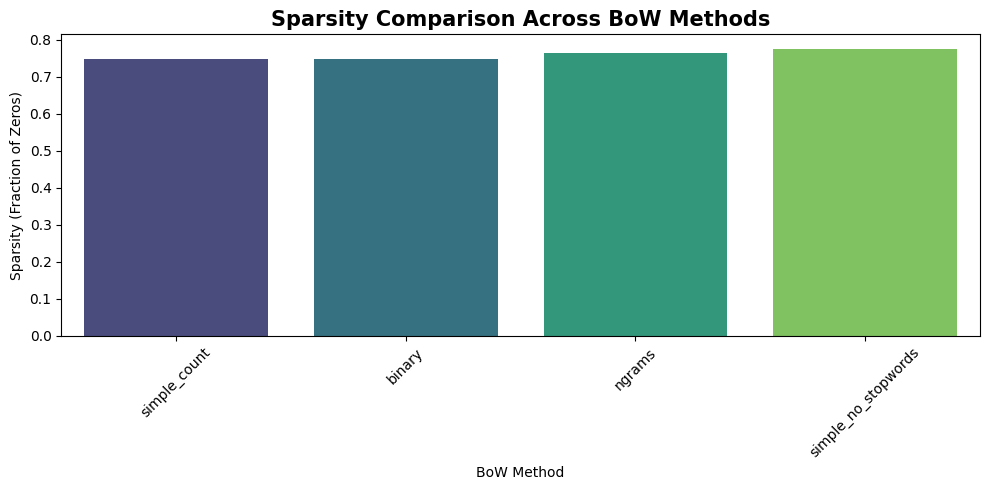

In [16]:
def main():
    """Main function to execute the BoW exploration project."""
    # Step 1: Create a small text corpus
    corpus = [
        "The cat sleeps quietly in the room",
        "The dog runs fast outside",
        "Cats love to sleep all day",
        "Dogs chase cats in the park",
        "The room is quiet and peaceful"
    ]
    logger.info(f"Corpus created with {len(corpus)} documents")

    # Initialize BoWExplorer
    explorer = BoWExplorer(corpus)
    # Run experiments
    explorer.run_experiments()
    # Display results
    explorer.display_results()
    # Compare sparsity
    explorer.compare_sparsity()
    # Save results
    explorer.save_results("bow_results.csv")

main()